In [1]:
import numpy  as np
import matplotlib.pyplot as plt

Consider a simple random walk on $[a,b] \in \mathbb{Z}$  with forward
probability $p$ , expcept at the boundary , $ p(a,a)=1-p = 1- p(a , a+1)$ and
$p(b,b) = p = 1 - p( b , b-1) $ . Define 
$ m^-_n \equiv \sum^n_{k=1} I_{\{X_{k-1} \;= a , X_k = a \}} \; , \; 
m^+_n \equiv \sum^n_{k=1} I_{\{X_{k-1} \;= b , X_k = b \}}$ , i.e the numbers
of reflection at the boundaries up to time $n$ . We want to know the distribution
of $ m^{\pm}_n$ .

In [42]:
def walk(p):
    alpha = np.random.rand()
    if alpha > p :
        return -1
    else :
        return 1
# Simulate the Markov chain with interval [a,b] , right fw probability p and time length n
def MC(a,b,p,n):
    
    X=np.zeros(n)
    m1=np.zeros(n)
    m2=np.zeros(n)
    
    
    i=0
    for i in range(n-1) :
        D = walk(p)
        
        #interior
        if (X[i] != a ) and  (X[i] != b ) :
            
            X[i+1] = X[i] + D 
            m1[i+1] = m1[i]
            m2[i+1] = m2[i]
        
        #left endpoint
        elif X[i] == a :
            if D == -1 :
                X[i+1] = a  
                m1[i+1] = m1[i]
                m2[i+1]= m2[i] +1
               
            else :
                X[i+1] = X[i] + D
                m1[i+1] = m1[i]
                m2[i+1] = m2[i]
        #right endpoint
        elif X[i] == b :
            if D == 1 :
                X[i+1] = b
                m1[i+1]= m1[i] +1
                m2[i+1] = m2[i]
            else :
                X[i+1] = X[i] + D
                m1[i+1] = m1[i]
                m2[i+1] = m2[i]
        i=i+1
    return X , m1 , m2

In [89]:
A=MC(-5,5,0.51,n )

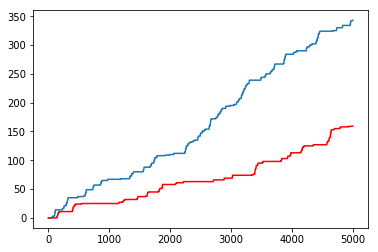

In [90]:
#plt.figure(figsize =(50,10))
plt.plot(A[1] )
plt.plot(A[2] , 'r-' )


In [83]:
X[]
(X[i] != a ) and  (X[i] !=b ) 

True

In [75]:

# run MC N times , record the left and right corssing of N paths
def MC2(a,b,p,n , N):
    
    R_cross = np.zeros((N,n))
    L_cross = np.zeros((N,n))
    for i in range(N):
        data = MC(a,b, p,n )
        R_cross[i] = data[1]
        L_cross[i] = data[2]
    return R_cross , L_cross

In [101]:
n = 5000
R_cross , L_cross = MC2(-4,4,0.55, n , n+2)

(array([  3.,   0.,   2.,   0.,   2.,   5.,   3.,   6.,   9.,   3.,  12.,
         31.,  17.,  27.,  44.,  20.,  47.,  51.,  33.,  72.,  74.,  41.,
         96.,  90.,  61., 126., 123., 143.,  64., 145., 150.,  83., 173.,
        169.,  68., 191., 179.,  88., 191., 157.,  70., 168., 179.,  71.,
        145., 154.,  75., 154.,  97.,  61.,  96.,  95.,  96.,  47.,  74.,
         79.,  35.,  61.,  58.,  28.,  49.,  53.,  20.,  33.,  27.,  11.,
         23.,  26.,  10.,  17.,  14.,   6.,  14.,   7.,   7.,   7.,   4.,
          3.,   3.,   6.,   1.,   0.,   2.,   2.,   0.,   2.,   1.,   1.,
          5.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          1.]),
 array([ 33.  ,  34.68,  36.36,  38.04,  39.72,  41.4 ,  43.08,  44.76,
         46.44,  48.12,  49.8 ,  51.48,  53.16,  54.84,  56.52,  58.2 ,
         59.88,  61.56,  63.24,  64.92,  66.6 ,  68.28,  69.96,  71.64,
         73.32,  75.  ,  76.68,  78.36,  80.04,  81.72,  83.4 ,  85.08,
         86.76,  88.44,  90.12

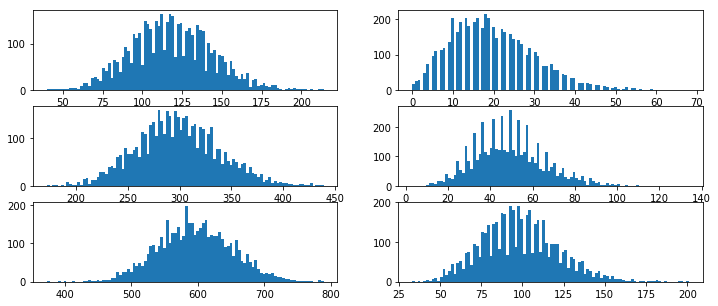

In [103]:
fig , ax = plt.subplots(3,2 ,  figsize=(12,5))
ax[0,0].hist(R_cross[:,1000] , bins =100)
ax[0,1].hist(L_cross[:,1000] , bins =100)
ax[1,0].hist(R_cross[:,2500] , bins =100)
ax[1,1].hist(L_cross[:,2500] , bins =100)
ax[2,0].hist(R_cross[:,4990] , bins =100)
ax[2,1].hist(L_cross[:,4990] , bins =100)

In [96]:
np.mean(R_cross[:,n-1])

330.61475409836066